# **Prediksi Jumlah Muatan Barang di Bandara Soekarno-Hatta untuk Penerbangan Domistik**
---
# **Pendahuluan**
## **Latar Belakang**
Bandara Soekarno-Hatta merupakan salah satu hub transportasi udara terbesar di Indonesia yang berperan penting dalam mendukung mobilitas barang domestik. Untuk menghadapi tantangan operasional seperti fluktuasi jumlah muatan barang yang dipengaruhi oleh faktor musiman, ekonomi, dan kebijakan logistik, pengelola bandara perlu memanfaatkan teknologi prediksi guna meningkatkan efisiensi operasional dan pelayanan logistik. Proyek ini berfokus pada pemodelan time series untuk memprediksi jumlah muatan barang domestik di masa mendatang, sehingga membantu pengelola bandara dan maskapai dalam pengambilan keputusan yang lebih tepat dan strategis.

Visi Bandara Soekarno-Hatta adalah menjadi bandara kelas dunia yang mendukung transportasi udara domestik dan internasional dengan efisiensi tinggi dan pelayanan terbaik. Dengan misi untuk menyediakan fasilitas logistik yang aman, cepat, dan terintegrasi, pengelola bandara mengadopsi strategi berbasis digitalisasi dan optimasi sumber daya guna meningkatkan kualitas pelayanan serta mendukung pertumbuhan sektor logistik di Indonesia. Proyek prediksi ini bertujuan untuk memberikan pemahaman lebih baik terhadap pola muatan barang dan mendukung pengambilan keputusan dalam hal pengelolaan kapasitas kargo serta perencanaan logistik.

Tujuan utama dari proyek ini adalah untuk membuat model yang memiliki akurasi tinggi dalam memprediksi jumlah muatan barang, sehingga mampu meminimalkan perbedaan nilai prediksi dengan data aktual serta mendukung perencanaan logistik yang lebih optimal.

## **Pernyataan Masalah**
1.   Bagaimana Cara Membangun Model yang Akurat dalam Memprediksi Jumlah Muatan Barang di Bandara Soekarno-Hatta untuk Penerbangan Domestik.

## **Tujuan**
Memprediksi jumlah muatan barang untuk penerbangan domestik di Bandara Soekarno-Hatta dengan akurasi tinggi, guna mendukung efisiensi operasional dan perencanaan logistik yang lebih baik.

# **Metodologi Penelitian**
### **Pemahaman Data**
---
Saya menggunakan data dari website Pusat Data Statistik (https://www.bps.go.id/id/statistics-table/2/NjcjMg==/jumlah-barang-yang-dimuat-di-bandara-utama--ton-.html), dengan cakupan muatan barang yang diangkut di Bandara Soekarno-Hatta untuk penerbangan domestik dari tahun 2006 hingga 2023. Data ini digunakan untuk menganalisis tren dan pola, yang dapat dijadikan acuan dalam pengambilan keputusan serta perencanaan yang lebih efektif di masa mendatang.

#### **Pengumpulan Data**

Import libary yang dibutuhkan

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler


In [126]:
df = pd.read_csv('https://raw.githubusercontent.com/alihasan313/psd/main/Muatan-barang.csv', sep=';')
df.head()

,tanggal,barang
0,2006-01,10.45
1,2006-02,8.37
2,2006-03,9.47
3,2006-04,9.27
4,2006-05,9.40


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   tanggal  216 non-null    object 
 1   barang   216 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.5+ KB


| Atribut  | Deskripsi                                              |
|----------|--------------------------------------------------------|
| tanggal  | Tanggal dengan interval 1 bulan.                       |
| barang   | Muatan barang yang diangkut dalam satuan TON.          |


#### **Konversi Tanggal** <BR>
Untuk memudahkan proses analisis data berbasis waktu, atribut tanggal diproses dengan mengubahnya menjadi tipe data datetime dan menjadikannya sebagai index.

In [128]:
df['tanggal'] = pd.to_datetime(df['tanggal'], dayfirst=True, format='%Y-%m').dt.date
df.set_index('tanggal', inplace=True)
df.index = pd.to_datetime(df.index)
df = df.sort_index()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 216 entries, 2006-01-01 to 2023-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   barang  216 non-null    float64
dtypes: float64(1)
memory usage: 3.4 KB


#### **Mengencek data null pada data**

In [129]:
print(df.isnull().sum())

barang    0
dtype: int64


Tidak terdapat data kosong pada data


#### **Mengencek Outlier**

Mengecek Menggunakan Boxplot

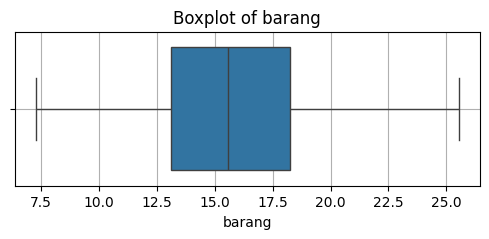

In [130]:
for col in df.columns:
    plt.subplots(figsize=(6, 2))
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')
    plt.grid(True)
    plt.show()

Mengecek menggunakan Z-score<br> dapat dilihat bahwa atribut barang tidak memiliki outlier.

In [131]:
from scipy import stats

def detect_outliers_zscore(data, column, threshold=3):
    z_scores = stats.zscore(data[column])
    outliers = data[abs(z_scores) > threshold]

    return outliers
outliers_terakhir_z = detect_outliers_zscore(df, 'barang')
print("Outliers di kolom Terakhir berdasarkan Z-Score:")
print(outliers_terakhir_z)


Outliers di kolom Terakhir berdasarkan Z-Score:
Empty DataFrame
Columns: [barang]
Index: []


#### **Visualisai data**

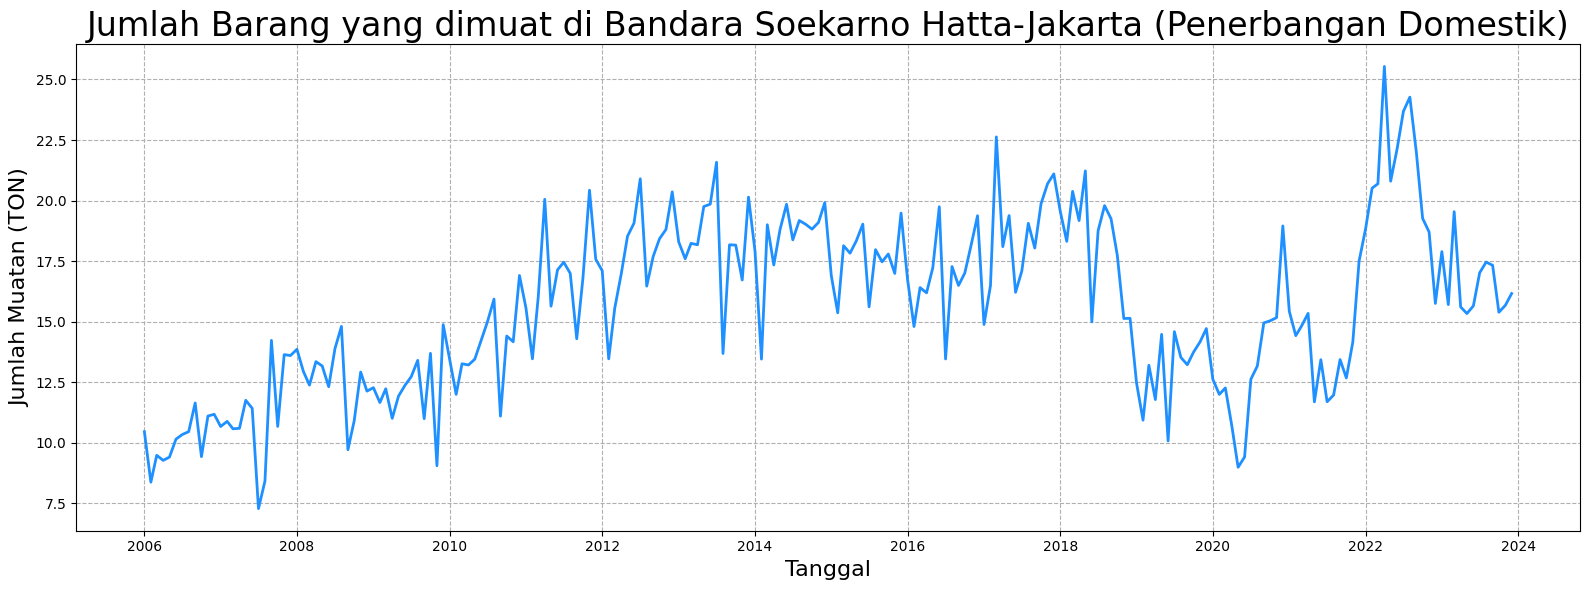

In [132]:
plt.figure(figsize=(16, 6))
plt.plot(df.index, df['barang'], color='dodgerblue', linewidth=2)
plt.title('Jumlah Barang yang dimuat di Bandara Soekarno Hatta-Jakarta (Penerbangan Domestik)', fontsize=24)
plt.xlabel('Tanggal', fontsize=16,)
plt.ylabel('Jumlah Muatan (TON)', fontsize=16)
plt.grid(True, linestyle='--', alpha=1)
plt.tight_layout()
plt.show()

---

### **Prapemrosesan Data**






#### **Normalisasi**

In [133]:
def normalize(df):
    scaler = MinMaxScaler()
    np_data_scaled = scaler.fit_transform(df)
    normalized_df = pd.DataFrame(np_data_scaled, columns=df.columns, index=df.index)
    
    pd.set_option('display.float_format', '{:.4f}'.format)
    
    return normalized_df, scaler

normalized_df, scaler = normalize(df)
# print(normalized_df)


#### **Sliding Window**

In [134]:
def sliding_window(data, lag):
    series = data['barang']
    result = pd.DataFrame()

    for l in lag:
        result[f'xt-{l}'] = series.shift(l)
    
    result['xt'] = series.shift(0)
    result = result.dropna()  

    result.index = series.index[lag[-1]:] 
    return result

windowed_data = sliding_window(df, [1, 2, 3])
windowed_data = windowed_data[['xt', 'xt-1', 'xt-2', 'xt-3']]

# windowed_data = sliding_window(df, [1, 2, 3, 4, 5])
# windowed_data = windowed_data[['xt', 'xt-1', 'xt-2', 'xt-3', 'xt-4', 'xt-5']]

pd.set_option('display.float_format', '{:.2f}'.format)
windowed_data

,xt,xt-1,xt-2,xt-3
tanggal,,,,
2006-04-01,9.27,9.47,8.37,10.45
2006-05-01,9.40,9.27,9.47,8.37
2006-06-01,10.14,9.40,9.27,9.47
2006-07-01,10.33,10.14,9.40,9.27
2006-08-01,10.45,10.33,10.14,9.40
...,...,...,...,...
2023-08-01,17.46,17.02,15.65,15.33
2023-09-01,17.32,17.46,17.02,15.65
2023-10-01,15.38,17.32,17.46,17.02


| Variabel | Deskripsi                                         |
|----------|---------------------------------------------------|
| `xt`     | Nilai Barang pada bulan tertentu.               |
| `xt-1`   | Nilai Barang pada bulan sebelumnya (t-1).       |
| `xt-2`   | Nilai Barang dua bulan sebelumnya (t-2).        |
| `xt-3`   | Nilai Barang tiga bulan sebelumnya (t-3).       |


In [135]:
# windowed_data.to_csv("muatan-barang-window.csv", index=False)

#### **Membagi Data**

In [136]:
def split_data(data, target, train_size):
    split_index = int(len(data) * train_size)

    x_train = data[:split_index]
    y_train = target[:split_index]
    x_test = data[split_index:]
    y_test = target[split_index:]

    return x_train, y_train, x_test, y_test

input_df = windowed_data[['xt-1', 'xt-2', 'xt-3']]
# input_df = windowed_data[['xt-1', 'xt-2', 'xt-3', 'xt-4', 'xt-5']]
target_df = windowed_data[['xt']]

x_train, y_train, x_test, y_test = split_data(input_df, target_df, 0.8)

print("X_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (170, 3)
y_train shape: (170, 1)
X_test shape: (43, 3)
y_test shape: (43, 1)


Data latih digunakan untuk melatih model, sedangkan data uji digunakan untuk menguji performa model setelah dilatih. Pembagian ini memastikan bahwa model tidak hanya mengingat data yang dilatih, tetapi juga dapat menggeneralisasi dan memberikan prediksi yang baik pada data yang belum pernah dilihat sebelumnya.



---
### **Pemodelan**



#### **Metrik Evaluasi Model Linear Regression**
##### 1. **Mean Squared Error (MSE)**
   - **Definisi**: MSE mengukur rata-rata kuadrat dari perbedaan antara nilai prediksi dan nilai aktual. Metrik ini memberikan gambaran seberapa besar kesalahan model dalam memprediksi nilai yang sebenarnya.
   - **Rumus**: 
     $$ \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$
   - **Interpretasi**: Semakin kecil nilai MSE, semakin baik model dalam memprediksi data yang sebenarnya. Nilai MSE yang lebih besar menunjukkan bahwa model kurang akurat, karena kesalahan prediksi lebih besar.

##### 2. **Root Mean Squared Error (RMSE)**
   - **Definisi**: RMSE adalah akar kuadrat dari MSE dan memberikan ukuran kesalahan dalam satuan yang sama dengan data asli. Ini memudahkan interpretasi karena hasilnya berada dalam skala yang sama dengan data.
   - **Rumus**: 
     $$ \text{RMSE} = \sqrt{\text{MSE}} $$
   - **Interpretasi**: Semakin kecil nilai RMSE, semakin baik model. RMSE memberikan gambaran seberapa besar rata-rata kesalahan model dalam satuan data asli. Model dengan RMSE yang lebih rendah dianggap lebih baik.

##### 3. **Mean Absolute Percentage Error (MAPE)**
   - **Definisi**: MAPE mengukur kesalahan prediksi dalam bentuk persentase, yaitu seberapa besar rata-rata kesalahan model dibandingkan dengan nilai aktual. Ini menunjukkan efektivitas model dalam bentuk yang lebih mudah dipahami (dalam persen).
   - **Rumus**: 
     $$ \text{MAPE} = \frac{1}{n} \sum_{i=1}^{n} \left| \frac{y_i - \hat{y}_i}{y_i} \right| \times 100 $$
   - **Interpretasi**: MAPE yang lebih rendah menunjukkan kesalahan yang lebih kecil dalam bentuk persentase. Biasanya, MAPE kurang dari 10% dianggap sangat baik, meskipun nilai yang dapat diterima sangat bergantung pada konteks aplikasi.<br>
     <BR>
     Di mana:

- $ y_i $ adalah nilai aktual (target).
- $ \hat{y}_i $ adalah nilai prediksi dari model.
- $ n $ adalah jumlah total data.


#### **Linier Regression**

In [137]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

LinearRegression()

Hasil Prediksi Dari Linier Regression
Mean Squared Error (MSE): 4.866492726617243
Root Mean Squared Error (RMSE): 2.206012857310048
Mean Absolute Percentage Error (MAPE): 10.87395764891487  %


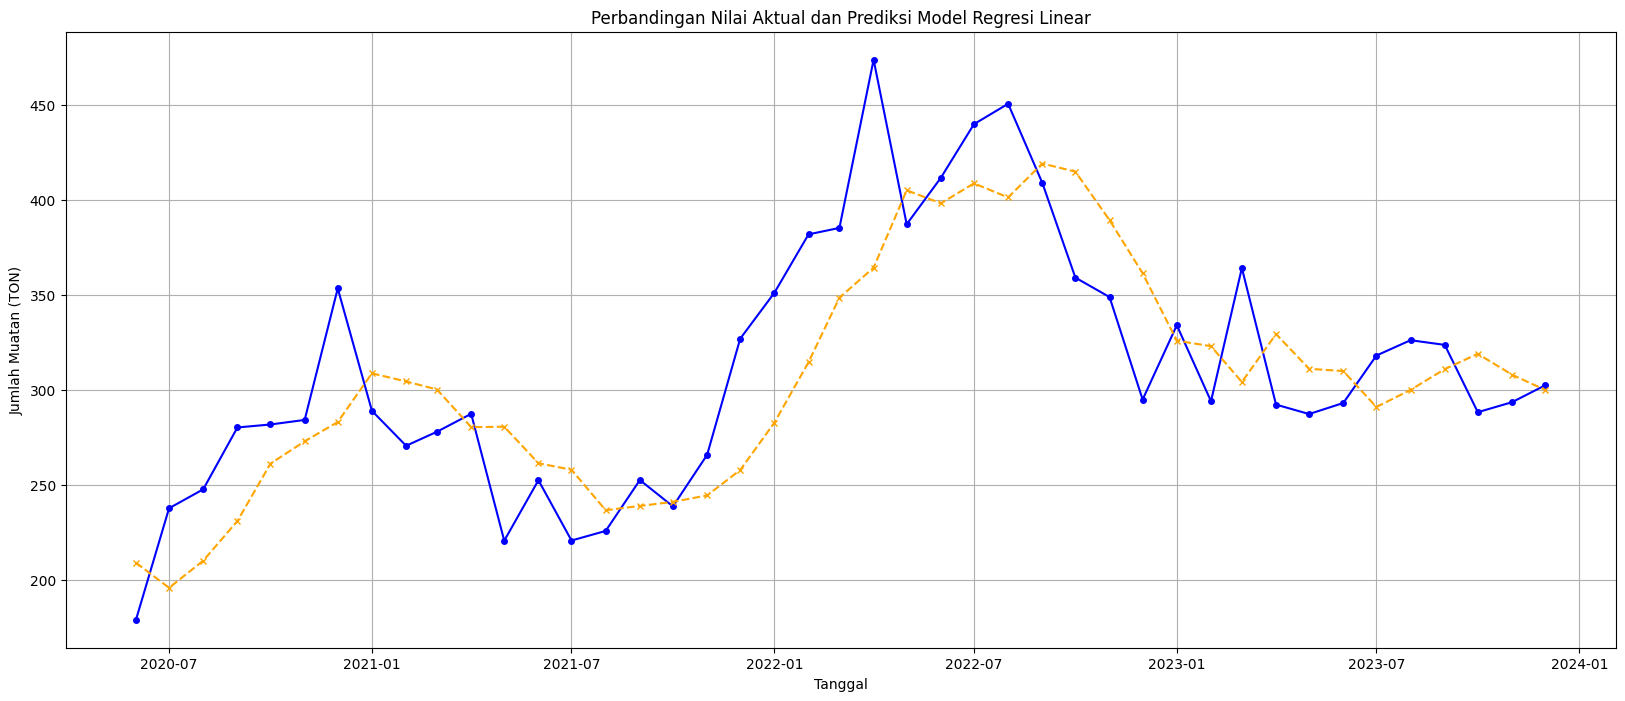

In [138]:
y_pred = linear_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)

print("Hasil Prediksi Dari Linier Regression")
print("Mean Squared Error (MSE):", mse,)
print("Root Mean Squared Error (RMSE):", rmse,)
print("Mean Absolute Percentage Error (MAPE):", mape *100, " %")

plt.figure(figsize=(20, 8))
plt.plot(y_test.index, scaler.inverse_transform(y_test.values.reshape(-1, 1)), label='Aktual', color='blue', marker='o', linestyle='-', markersize=4)
plt.plot(y_test.index, scaler.inverse_transform(y_pred.reshape(-1, 1)), label='Prediksi', color='orange', marker='x', linestyle='--', markersize=4)
plt.title('Perbandingan Nilai Aktual dan Prediksi Model Regresi Linear')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Muatan (TON)')
plt.grid()
plt.show()

#### **Random Forest Regressor**

e:\laragon\bin\python\python-3.10\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest Regressor:
Mean Squared Error (MSE): 9.271851188062781
Root Mean Squared Error (RMSE): 3.044971459318261
Mean Absolute Percentage Error (MAPE): 13.13782360860084 %


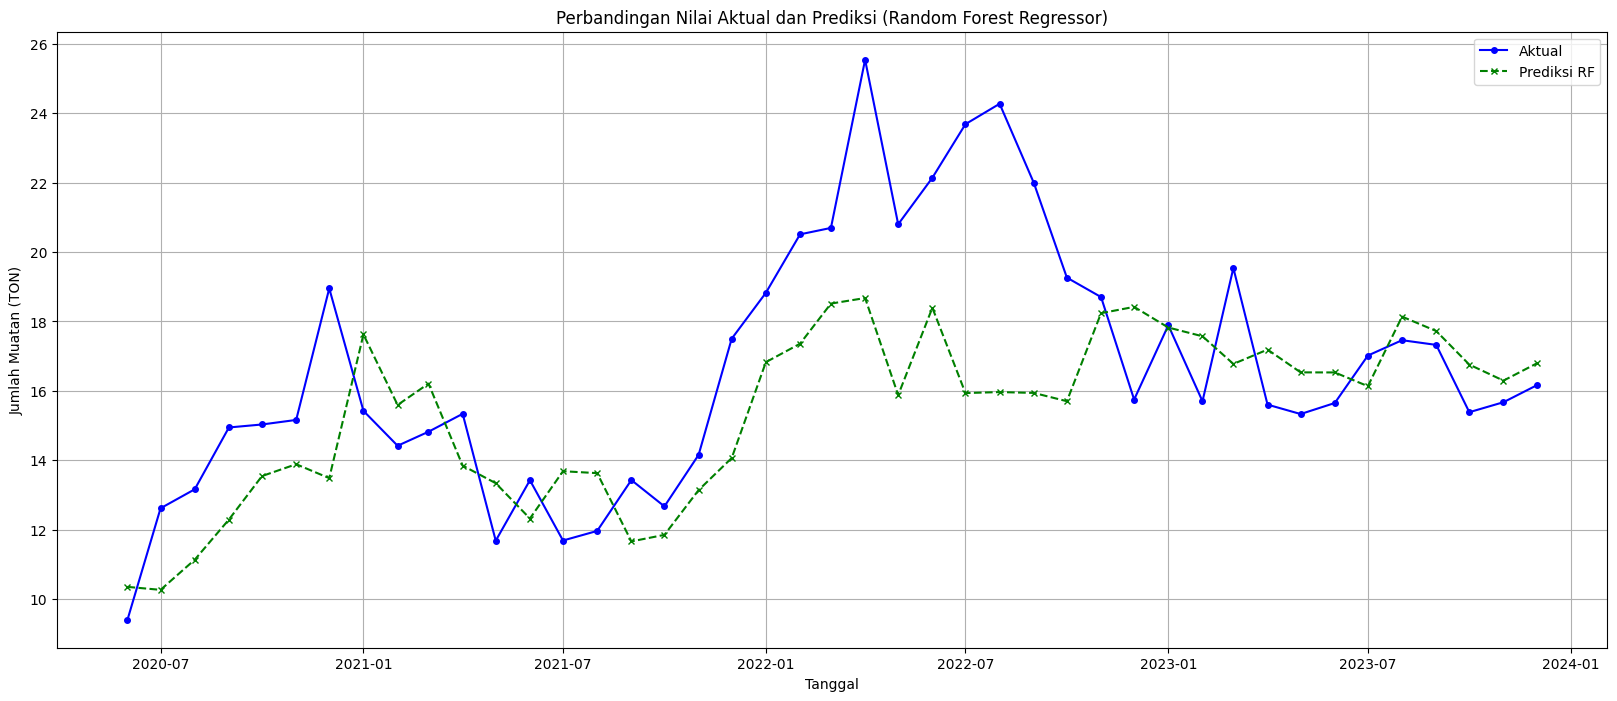

In [139]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

model_rf.fit(x_train, y_train)

y_pred_rf = model_rf.predict(x_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf)

print("Random Forest Regressor:")
print("Mean Squared Error (MSE):", mse_rf)
print("Root Mean Squared Error (RMSE):", rmse_rf)
print("Mean Absolute Percentage Error (MAPE):", mape_rf  *100, "%")

plt.figure(figsize=(20, 8))
plt.plot(y_test.index, y_test, label="Aktual", color="blue", marker="o", linestyle="-", markersize=4)
plt.plot(y_test.index, y_pred_rf, label="Prediksi RF", color="green", marker="x", linestyle="--", markersize=4)
plt.title("Perbandingan Nilai Aktual dan Prediksi (Random Forest Regressor)")
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Muatan (TON)")
plt.legend()
plt.grid()
plt.show()


#### **Support Vector Regression(SVR)**

SVR:
Mean Squared Error (MSE): 10.094834440757104
Root Mean Squared Error (RMSE): 3.1772369192046575
Mean Absolute Percentage Error (MAPE): 14.115066953750514 %


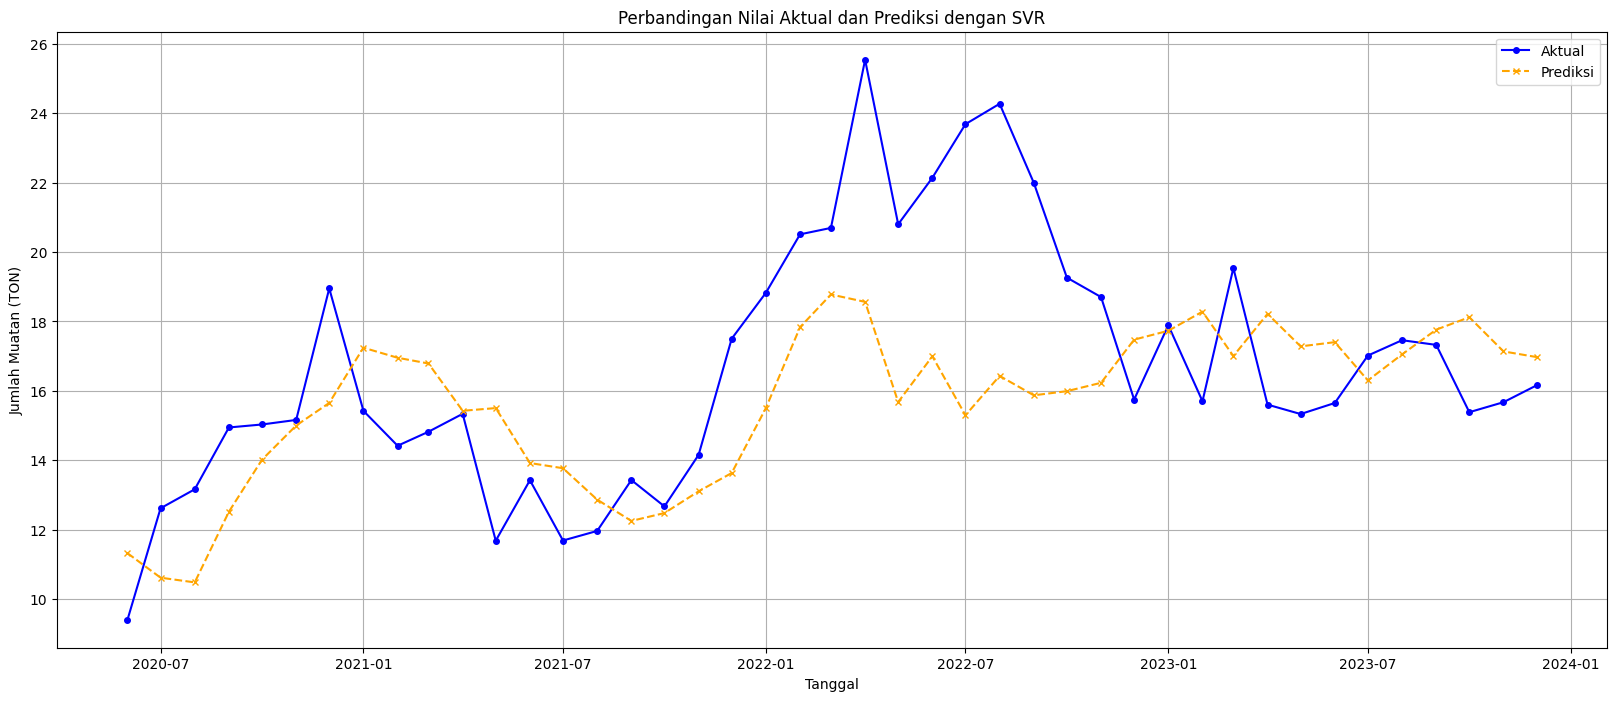

In [140]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np
import matplotlib.pyplot as plt

scaler_x = StandardScaler()
scaler_y = StandardScaler()
x_train_scaled = scaler_x.fit_transform(x_train)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
x_test_scaled = scaler_x.transform(x_test)
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr_model.fit(x_train_scaled, y_train_scaled.ravel())

y_pred_scaled = svr_model.predict(x_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)

print("SVR:")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape * 100, "%")

plt.figure(figsize=(20, 8))
plt.plot(y_test.index, y_test, label='Aktual', color='blue', marker='o', linestyle='-', markersize=4)
plt.plot(y_test.index, y_pred, label='Prediksi', color='orange', marker='x', linestyle='--', markersize=4)
plt.title('Perbandingan Nilai Aktual dan Prediksi dengan SVR')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Muatan (TON)')
plt.grid(True)
plt.legend()
plt.show()


#### **Bagging Regressor**

e:\laragon\bin\python\python-3.10\lib\site-packages\sklearn\ensemble\_bagging.py:581: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


Bagging Regressor with Linear Regression:
Mean Squared Error (MSE): 4.882640359484597
Root Mean Squared Error (RMSE): 2.2096697399124143
Mean Absolute Percentage Error (MAPE): 10.911718327046705  %


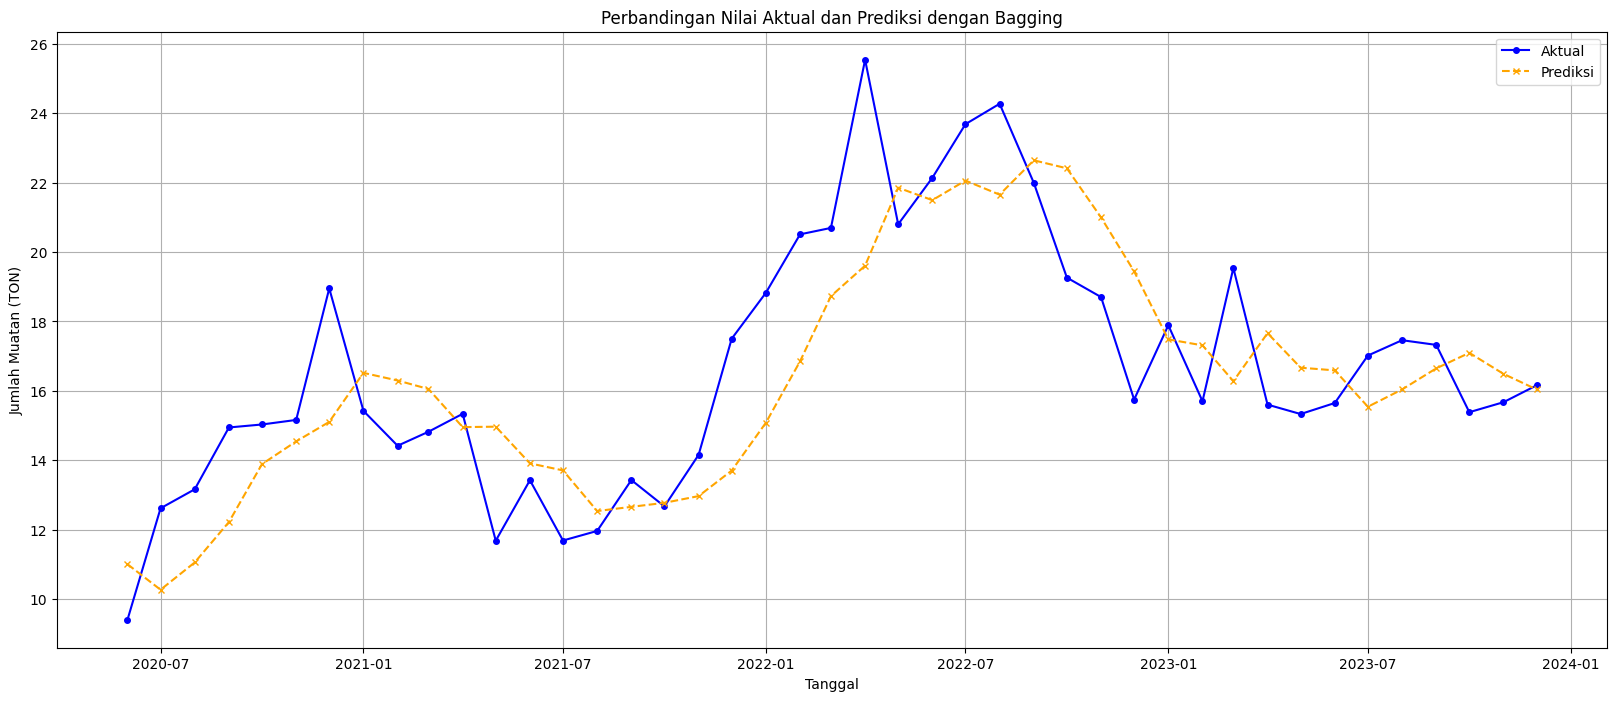

In [141]:
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt

base_model = LinearRegression()
bagging_model = BaggingRegressor(base_model, n_estimators=50, random_state=42)
bagging_model.fit(x_train, y_train)
y_pred_bagging = bagging_model.predict(x_test)
mse_bagging = mean_squared_error(y_test, y_pred_bagging)
rmse_bagging = np.sqrt(mse_bagging)
mape_bagging = mean_absolute_percentage_error(y_test, y_pred_bagging)

print("Bagging Regressor with Linear Regression:")
print("Mean Squared Error (MSE):", mse_bagging)
print("Root Mean Squared Error (RMSE):", rmse_bagging)
print("Mean Absolute Percentage Error (MAPE):", mape_bagging  *100, " %")

plt.figure(figsize=(20, 8))
plt.plot(y_test.index, y_test, label='Aktual', color='blue', marker='o', linestyle='-', markersize=4)
plt.plot(y_test.index, y_pred_bagging, label='Prediksi', color='orange', marker='x', linestyle='--', markersize=4)
plt.title('Perbandingan Nilai Aktual dan Prediksi dengan Bagging')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Muatan (TON)')
plt.grid(True)
plt.legend()
plt.show()  




---

### **Evalusai**

#### **Grid Search**

In [142]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def grid_search(input_df, target_df, splits, estimators, bootstrap, max_samples):
    best_rmse = float('inf')
    best_params = None
    i = 0
    for split in splits:
        x_train, y_train, x_test, y_test = split_data(input_df, target_df, split)
        for estimator in estimators:
            for bootstrap in bootstraps:
                for max_sample in max_samples:
                    base_model = LinearRegression()
                    bagging_model = BaggingRegressor(estimator=base_model, n_estimators=estimator, bootstrap=bootstrap, max_samples=max_sample)
                    bagging_model.fit(x_train, y_train.values.ravel())
                    y_pred = bagging_model.predict(x_test)
                    i+=1
                    current_rmse = rmse(y_test, y_pred)
                    if current_rmse < best_rmse:
                        best_rmse = current_rmse
                        best_mse = mean_squared_error(y_test, y_pred)
                        best_mape = mean_absolute_percentage_error(y_test, y_pred)
                        best_model = bagging_model
                        best_params = {'estimator': estimator, 'bootstrap': bootstrap, 'train_sample': split, 'max_sample': max_sample}
                        y_test = y_test
                        y_pred = y_pred
    return best_params, best_rmse, best_mse, best_mape, best_model, y_test, y_pred

splits = [0.7, 0.75, 0.8, 0.85, 0.9]
estimators = [10, 20, 50, 100]
bootstraps = [True, False]
max_samples = [0.8, 0.9, 1.0]

best_params, best_rmse, best_mse, best_mape, best_model, y_test, y_pred = grid_search(input_df, target_df, splits, estimators, bootstraps, max_samples)

In [143]:
print(f'Best parameters: {best_params}')
print(f'Best RMSE: {best_rmse}')
print(f'Best MSE: {"{:.20f}".format(best_mse)}')
print(f'Best MAPE: {best_mape  *100 } %')

Best parameters: {'estimator': 20, 'bootstrap': True, 'train_sample': 0.75, 'max_sample': 0.9}
Best RMSE: 2.074739583707973
Best MSE: 4.30454434020473453160
Best MAPE: 10.74585277797742 %


#### **Uji Coba**

In [144]:
muatan_bulan_ini = float(input("Muatan barang pesawat bulan ini: "))
muatan_bulan_sebelumnya = float(input("Muatan barang pesawat 1 bulan sebelumnya: "))
muatan_2_bulan_sebelumnya = float(input("Muatan barang pesawat 2 bulan sebelumnya: "))

rata_rata_perubahan = (
    (muatan_bulan_ini - muatan_bulan_sebelumnya) +
    (muatan_bulan_sebelumnya - muatan_2_bulan_sebelumnya)
) / 2

prediksi_muatan_bulan_depan = muatan_bulan_ini + rata_rata_perubahan

percentage_change = ((prediksi_muatan_bulan_depan - muatan_bulan_ini) / muatan_bulan_ini) * 100
change_sign = '+' if percentage_change > 0 else ''

formatted_predicted_value = f"{prediksi_muatan_bulan_depan:,.2f}".replace(',', 'X').replace('.', ',').replace('X', '.')
formatted_last_muatan = f"{muatan_bulan_ini:,.2f}".replace(',', 'X').replace('.', ',').replace('X', '.')

print(f'Muatan barang pesawat bulan ini: {formatted_last_muatan} kg')
print(f'Prediksi muatan barang pesawat untuk bulan depan: {formatted_predicted_value} kg ({change_sign}{percentage_change:.2f}%)')


Muatan barang pesawat bulan ini: 15,76 kg
Prediksi muatan barang pesawat untuk bulan depan: 15,03 kg (-4.67%)


# **Dampak Hasil Analisis**
Hasil analisis prediksi jumlah muatan barang di Bandara Soekarno-Hatta memberikan dampak utama berikut:

1. **Dukungan dalam Perencanaan Operasional**  
   Membantu maskapai dan operator logistik dalam menentukan jadwal penerbangan dan alokasi sumber daya.

2. **Peningkatan Efisiensi Biaya Operasional**  
   Mengurangi biaya penyimpanan dan pengangkutan dengan perencanaan berbasis data prediksi.

3. **Pengambilan Keputusan Strategis**  
   Memberikan wawasan untuk strategi pengembangan infrastruktur logistik.




---


# **Strategi Berdasarkan Hasil Analisis**
1. **Pengelolaan Kapasitas Kargo yang Proaktif**
   - Mengalokasikan ruang kargo secara dinamis berdasarkan prediksi.
   - Menyesuaikan jadwal pengiriman dengan puncak volume muatan.

2. **Optimalisasi Sumber Daya Operasional**
   - Menyusun jadwal kerja yang efisien untuk staf logistik.
   - Mengoptimalkan rotasi armada logistik.

3. **Penyusunan Kebijakan Berdasarkan Pola Musiman**
   - Strategi khusus untuk periode lonjakan volume muatan.
   - Promosi tarif logistik saat volume rendah.

4. **Perencanaan Infrastruktur Jangka Panjang**
   - Pengembangan fasilitas logistik berdasarkan tren jangka panjang.

# **Deploy**

https://huggingface.co/spaces/alihasan8/psd-2